# Quantum Facts in Qiskit
Here some useful topics will be covered and others recalled to make you more familiar with quantum terms and concepts.

Start by some typical setup and definition of useful functions, which you are encouraged to look at.

Then, head to the [exercises start](#Exercises-Start-Here) to start coding!

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [2]:
# Choose the drawer you like best:
from qiskit.tools.visualization import matplotlib_circuit_drawer as draw
#from qiskit.tools.visualization import circuit_drawer as draw

In [3]:
from qiskit import IBMQ
IBMQ.load_accounts() # make sure you have setup your token locally to use this

In [4]:
%matplotlib inline

## Utils for visualizing experimental results

In [5]:
import matplotlib.pyplot as plt

def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

## Utils for executing circuits

In [6]:
from qiskit import Aer
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from Aer()>, <QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulator('statevector_simulator') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>, <CliffordSimulator('clifford_simulator') from Aer()>]


In [7]:
# see a list of available remote backends (these are freely given by IBM)
print("IBMQ Backends: ", IBMQ.backends())

IBMQ Backends:  [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx5') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


### Execute locally

In [8]:
# execute circuit and either display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: ", result_sim, result_counts)
    
    if draw_circuit: # draw the circuit
        draw(qc)
    else: # or show the results
        show_results(result_counts)

### Execute remotely

In [9]:
from qiskit.backends.ibmq import least_busy
import time
# Compile and run on a real device backend
def execute_remotely(qc, draw_circuit=False):
    if draw_circuit: # draw the circuit
        draw(qc)
    try:
        # select least busy available device and execute.
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        # running the job
        job_exp = execute(qc, backend=least_busy_device, shots=1024, max_credits=10)

        lapse, interval = 0, 10
        while job_exp.status().name != 'DONE':
            print('Status @ {} seconds'.format(interval * lapse))
            print(job_exp.status())
            time.sleep(interval)
            lapse += 1
        print(job_exp.status())
        exp_result = job_exp.result()
        result_counts = exp_result.get_counts(qc)

        # Show the results
        print("experiment: ", exp_result, result_counts)
        if not draw_circuit: # show the results
            show_results(result_counts)
    except:
        print("All devices are currently unavailable.")

## Building the circuit

In [10]:
def new_circuit(size):
    # Create a Quantum Register with size qubits
    qr = QuantumRegister(size)

    # Create a Classical Register with size bits
    cr = ClassicalRegister(size)

    # Create a Quantum Circuit acting on the qr and cr register
    return qr, cr, QuantumCircuit(qr, cr)

---
<h1 align="center">Exercises Start Here</h1>

Make sure you ran all the above cells in order, as the following exercises use functions defined and imported above.

## Creating Entanglement
Although, you have already entangled qubits on the previous week, you were not aware of it.

Naturally, we will redo some of those tasks and focus on interpreting their results.

### Hadamard + CNOT

**TASK:** Create a new circuit with 2 qubits using `new_circuit` (very useful to reconstruct your circuit in Jupyter)

In [11]:
qr, cr, circuit = new_circuit(2)

**TASK:** Add a Hadamard on qubit 0

In [12]:
# H gate on qubit 0
circuit.h(qr[0]);

**TASK:** Add a CX (CNOT) gate on control qubit 0 and target qubit 1

In [13]:
circuit.cx(qr[0], qr[1]);

**TASK:** Perform a measurement

In [14]:
# measure the qubits
circuit.measure(qr, cr);

**TASK:** check the result using `execute_locally` test both `True` and `False` for the `draw_circuit` option

simulation:  COMPLETED {'00': 504, '11': 520}


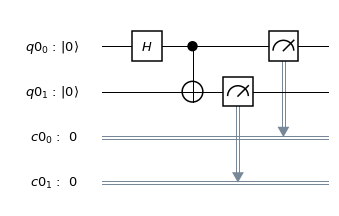

In [15]:
# Try both commands:
execute_locally(circuit,draw_circuit=True)
# execute_locally(circuit,draw_circuit=False)

The result should be something like `COMPLETED {'00': 506, '11': 518}`.

**TASK:** What does this mean?

> Given two qubits, we could end up with the measurements `00`, `01`, `10` and `11` (4 possibilities)
> 
> However, we got only `00` and `11` (2 cases)! This is due to the fact that our qubits are **entangled**!
>
> The state of qubit 1 is correlated to that of qubit 0 (control bit). Correlation means the implication is true in both directions.
>
> By making them entangled, we have ensured that `00` and `11` are the only possible states: if qubit 0 measures to 1 the other qubit, according to our circuit, could never have been 0, as it will be flipped from a starting state of 0.
>
> Furthermore, we could apply the gates, take both qubits elsewhere (apart from each other) without destroying any superposition, perform the measurements and the result would not change... curious, right?
>
> This particular disposition of entangled qubits describes what is known as a [Bell state](https://en.wikipedia.org/wiki/Bell_state). 

## Bell state in IBMQ
**TASK:** Get the QASM specification for your code and use it on [IBMQ QASM editor](https://quantumexperience.ng.bluemix.net/qx/qasm)

In [16]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



> You will probably get an error for trying to execute this QASM, like:
>
> `Error in line 6: CX gate between q2[0], q2[1] is not allowed in this topology`
>
> To sort it, simply apply the Hadamard to `q2[1]` and change the CNOT to `cx q2[1] q2[0]`:
```qasm
OPENQASM 2.0;
include "qelib1.inc";
qreg q2[2];
creg c2[2];
h q2[1];
cx q2[1],q2[0];
measure q2[0] -> c2[0];
measure q2[1] -> c2[1];
```
> This is exactly the same circuit, but the norm seems to prefer this orientation rather than our original one (With the control qubit on the CNOT underneath the target qubit).

---
### More entanglement
**TASK:** Repeat the previous circuit, but add a bit-flip on the target qubit

In [17]:
# create the circuit
qr, cr, circuit = new_circuit(2)

**TASK:** Add a Hadamard on qubit 0

In [18]:
# H gate on qubit 0
circuit.h(qr[0]);

**TASK:** Add an X gate on qubit 1

In [19]:
# X gate on qubit 1
circuit.x(qr[1]);

**TASK:** Add a CX (CNOT) gate on control qubit 0 and target qubit 1

In [20]:
circuit.cx(qr[0], qr[1]);

**TASK:** Perform a measurement

In [21]:
# measure the qubits
circuit.measure(qr, cr);

**TASK:** check the result using `execute_locally` test both `True` and `False` for the `draw_circuit` option

simulation:  COMPLETED {'01': 513, '10': 511}


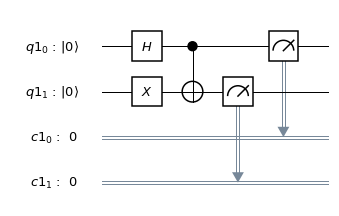

In [22]:
# Try both commands:
execute_locally(circuit,draw_circuit=True)
# execute_locally(circuit,draw_circuit=False)

**TASK:** Observe the results

> The same phenomena happened, however the states now were `01` and `10`, only 2 out of 4 possibilities!

## Quantum measurement in different basis
Given any of our previous circuits, we are going to measure them on both the zero-one basis as well as on the plus-minus basis.

**TASK:** Reconstruct one of the previous circuits (do not apply the measurement yet)

In [23]:
# create the circuit
qr, cr, circuit = new_circuit(2)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1]);

**TASK:** Add a Hadamard after each qubit

In [24]:
circuit.h(qr);

**TASK:** perform the measurement now and execute

simulation:  COMPLETED {'00': 517, '11': 507}


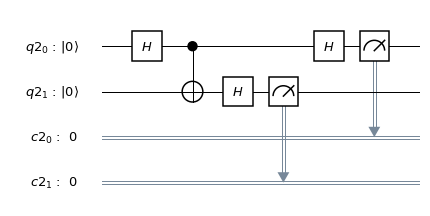

In [25]:
circuit.measure(qr, cr)
execute_locally(circuit,draw_circuit=True)

**TASK:** Why is this measurement different from the previous one?

> Since we applied the Hadamard gate on our qubits, their superposition was shifted accordingly, meaning the $\alpha$ and $\beta$ on the superposition were rotated by 45º. Once we measure, now, the result should be interpreted in the plus-minus basis, meaning that 1 is |+> and 0 is |->.

# Free flow
Take a look at the following explanation of Entanglement, taken from the [qiskit-tutorial](https://github.com/Qiskit/qiskit-tutorial/blob/master/community/terra/qis_intro/entanglement_introduction.ipynb)

### Entanglement

The core idea behind the second Principle is *entanglement*. Upon reading the Principle, one might be inclined to think that entanglement is simply strong correlation between two entitities -- but entanglement goes well beyond mere perfect (classical) correlation. If you and I read the same paper, we will have learned the same information. If a third person comes along and reads the same paper they <i>also</i> will have learned this information. All three persons in this case are perfectly correlated, and they will remain correlated even if they are separated from each other. 

The situation with quantum entanglement is a bit more subtle. In the quantum world, you and I could read the same quantum paper, and yet we will not learn what information is actually contained in the paper until we get together and share our information. However, when we are together, we find that we can unlock more information from the paper than we initially thought possible. Thus, quantum entanglement goes much further than perfect correlation.

To demonstrate this, we will define the controlled-NOT (CNOT) gate and the composition of two systems. The convention we use Qiskit is to label states by writing the first qubit's name in the rightmost position, thereby allowing us to easily convert from binary to decimal. As a result, we define the tensor product between operators $q_0$ and $q_1$ by $q_1\otimes q_0$. 

Taking $q_0$ as the control and $q_1$ as the target, the CNOT with this representation is given by

$$ CNOT =\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{pmatrix},$$

which is non-standard in the quantum community, but more easily connects to classical computing, where the least significant bit (LSB) is typically on the right. An entangled state of the two qubits can be made via an $H$ gate on the control qubit, followed by the CNOT gate. This generates a particular maximally entangled two-qubit state known as a Bell state, named after John Stewart Bell ([learn more about Bell and his contributions to quantum physics and entanglement](https://en.wikipedia.org/wiki/John_Stewart_Bell)). 


---

# Entanglement on a real device
**TASK:** Create a simple entanglement and execute it on a real device.

In [26]:
qr, cr, circuit = new_circuit(2)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.h(qr)
circuit.measure(qr, cr);

Running on current least busy device:  ibmq_16_melbourne
Status @ 0 seconds
JobStatus.INITIALIZING
Status @ 10 seconds
JobStatus.QUEUED
Status @ 20 seconds
JobStatus.QUEUED
Status @ 30 seconds
JobStatus.QUEUED
Status @ 40 seconds
JobStatus.QUEUED
Status @ 50 seconds
JobStatus.RUNNING
Status @ 60 seconds
JobStatus.RUNNING
JobStatus.DONE
experiment:  COMPLETED {'00': 455, '01': 41, '10': 51, '11': 477}


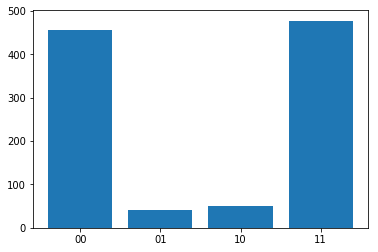

In [27]:
execute_remotely(circuit)

**TASK:** Comment on the results

> 
**Important:** Once you get the results, you may see that, in fact, most of the iterations resulted in `00` and `11`. The remaining options `01` and `10` are due to the immense difficulty with which quantum entanglement is preserved in nowadays labs' conditions. Nonetheless, these are still extraordinary results!